<div class='alert alert-info'>
 <h1><center> <font color='Darkblue'>Random Forest Regression<font><center></h1></div>

# <font color='#AA33A1'> Random Forest Regression<font>

        Random Forest is a Ensemble Learning Technique that uses multiple Decision Trees to improve prediction accuaracy and reduce overfitting.In Random Forest Regression,multiple decision trees are trained on different subsets of the data,and the final prediction is obtained by averaging the predictions of all the trees.

        Random Forest is a Supervised Machine Learning algorithm which uses ensemble learning method for classification and regression

        Random Forest is a bagging technique and not a boosting technique.The trees in random Forest are run in parallel.There is no interaction between these trees while building the trees.

        Here we have trained with different models independently without depending on any other algorithm.
        
        The basic idea behind Random Forest is that it combines multiple decision trees to determine the final output.that is it builds multiple decision trees and merges thier predictions together to get a more accurate and stable prediction.

        There are two steps in the Random Forest Algorithm ,one is random forest creation ,the other is to make a prediction from the random forest regressor created in the first step.

# <font color='Darkgreen'> Creation<font>

## step1 :
                If the number of cases in the training set is N,sample N cases at random -but with replacement ,from the original data.This Sample will be the training set for growing the tree.
 ##        Step2:
                If there are M input variables,a number is specified such that at each node,m variables are selected at random out of the M and the best split on this m is used to split the node.

# <font color='Darkgreen'> Prediction<font>

    The random forest prediction is broken down in the below steps:
            1.Takes the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome(target).
            
            2.Claculate the average of all the outcomes.

            3.Considered the average as the final prediction from the random forest algorithm.

        

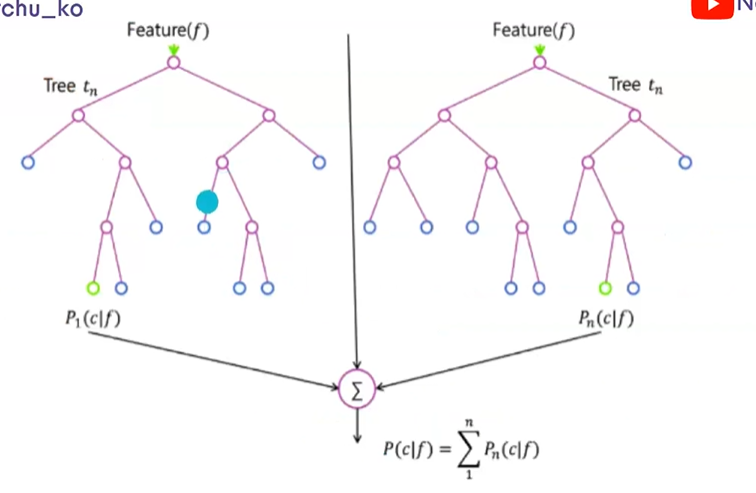

In [65]:
Image.open('s79.png')

# <font color='#AA33A1'>2.How Random Forest Regression Works?<font>
####   1.Bootstrapping:
        The dataset is randomly sampled with replacement to create multiple subsets.

####        2.Train Decision Trees: 
        Each subset is used to train an individual Decision Tree Regressor.
            
 ####       3.Feature Randomization: 
         At each node split, a random subset of features is considered instead of all features.

 ####       4.Prediction:
         The final prediction is the average of predictions from all individual trees.

# <font color='#AA33A1'>3.Advantages of Random Forest Regression<font>
        ✅ Reduces Overfitting – By combining multiple trees, it generalizes better than individual decision trees.
        ✅ Handles Missing Data – Can work well even if some data is missing.
        ✅ Feature Importance – Can rank the importance of different features.
        ✅ Works on Large Datasets – Efficient for high-dimensional data.
        


<div class='alert alert-info'>
    <h1><center><font color='Darkblue'>Random Forest Regression Implementation in Python</font></center></h1>
</div>

In [66]:
# Importing the Required Librararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#loading the dataset
df=pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [74]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [75]:
X=df.iloc[:,1:-1].values
Y=df.iloc[:,2:].values


In [76]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [77]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=3,random_state=0)
regressor.fit(X,Y)

RandomForestRegressor(n_estimators=3, random_state=0)

In [79]:
y_pred=regressor.predict([[6.5]])

In [80]:
y_pred

array([153333.33333333])

In [82]:
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [83]:
y_pred=regressor.predict([[5.5]])
y_pred

array([100000.])

<div class='alert alert-info'>
    <h1><center><font color='Darkblue'>Random Forest Regression Implementation in Python 2</font></center></h1>
</div>

In [98]:
#importing the required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.tree import plot_tree

In [85]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [86]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Create Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)


In [112]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [113]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

In [114]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.4735
R² Score: 0.6387


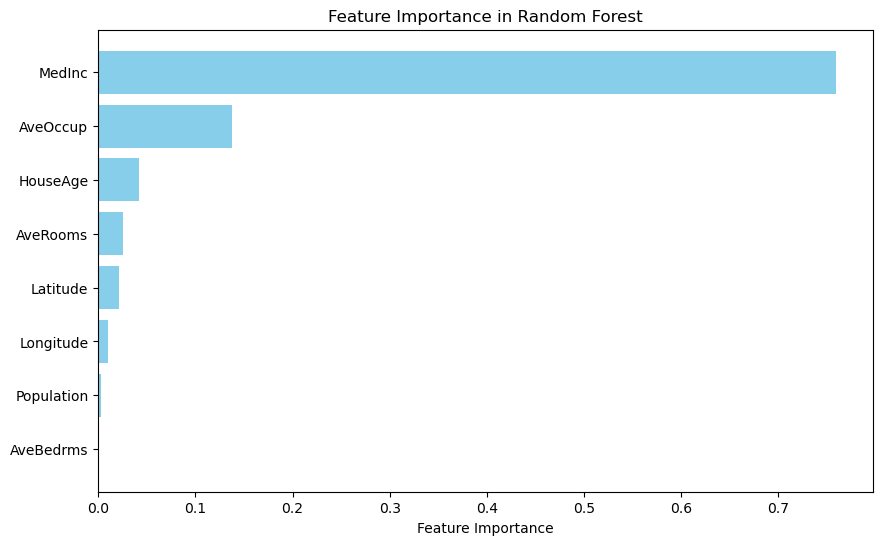

In [115]:
# Visualization 1: Feature Importance
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[indices], align='center', color='skyblue')
plt.yticks(range(X.shape[1]), np.array(data.feature_names)[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

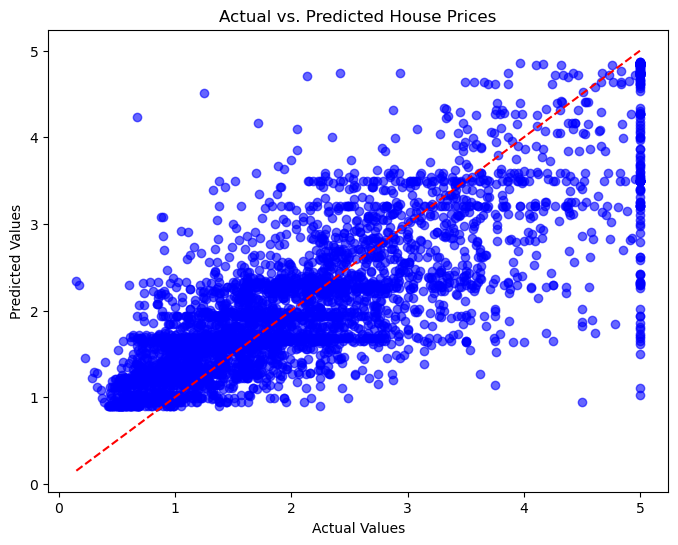

In [116]:
# Visualization 2: Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted House Prices")
plt.show()

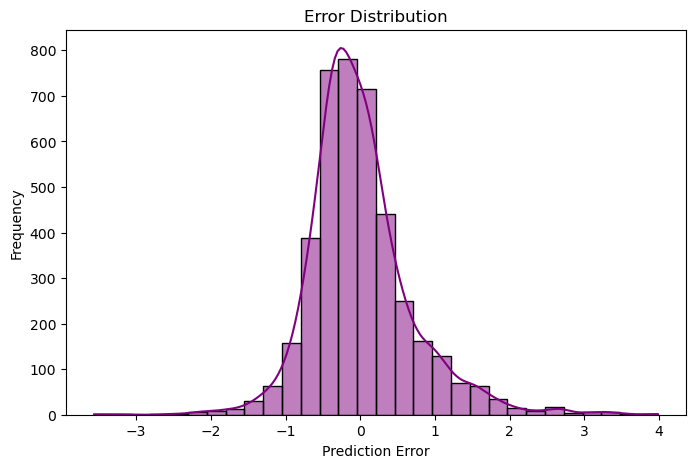

In [117]:
# Visualization 3: Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

In [118]:
# Extract one tree from the forest
one_tree = rf_regressor.estimators_[0]


In [122]:
plt.figure(figsize=(200, 100))
plot_tree(one_tree, feature_names=data.feature_names, filled=True, rounded=True)
plt.show()

# <font color='#AA33A1'>Hyperparameter Tuning for Random Forest Regression<font>

        You can tune the hyperparameters to improve performance:
        
 ###       1.n_estimators:
         Number of trees (default = 100, increasing improves accuracy but increases computation).
        
 ###       2.max_depth: 
         Maximum depth of each tree (controls overfitting).
        
 ###       3.min_samples_split: 
         Minimum samples required to split a node.
        
###        4.min_samples_leaf: 
        Minimum samples required in a leaf node.
        
###        5.max_features: 
        Number of features to consider for splitting at each node.

        
        You can use GridSearchCV or RandomizedSearchCV to find the best hyperparameters.

# <font color='FFAA31'>When to Use Random Forest Regression?<font>
        ✔️ When you have non-linear and complex relationships in the data.
        ✔️ When you need higher accuracy and better generalization.
        ✔️ When you have a large dataset with many features.
        
        🔹 Try running the code and let me know if you have any questions! 🚀